In [43]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [44]:
def fractal_tree(n, bottom = 0, top = 1, topping = False):
    md1 = (top - bottom)/4
    md2 = 3*(top - bottom)/4
    if(n == 0): 
        if(topping): #sparsify a little
            return [top]
        else:
            return [] #[bottom] <- this is just too many points
    else:
        return fractal_tree(n-1, bottom, bottom + md1) + fractal_tree(n-1, bottom + md2, top, True)


In [45]:
seed(123)
x = fractal_tree(7)
dataX = []
dataY = []
for i in x:
    for j in x:
        noiseX = i #+ 0.001*randn()
        noiseY = j #+ 0.001*randn()
        dataX.append(noiseX)
        dataY.append(noiseY)
print(len(x))

64


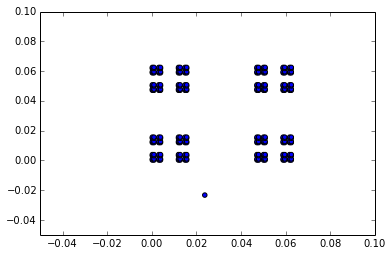

In [46]:
dataX += list(1.5*rand(80) - 0.25)
dataY += list(1.5*rand(80) - 0.25)
xlim(-0.05,0.1)
ylim(-0.05,0.1)
scatter(dataX,dataY)

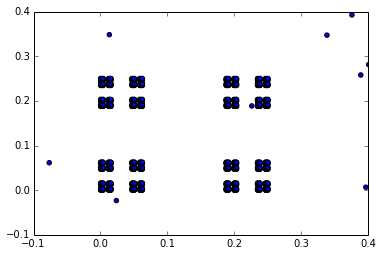

In [47]:
xlim(-0.1,0.4)
ylim(-0.1,0.4)
scatter(dataX,dataY)

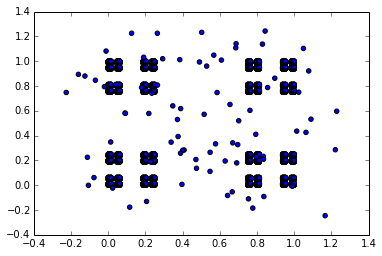

In [48]:
scatter(dataX,dataY)

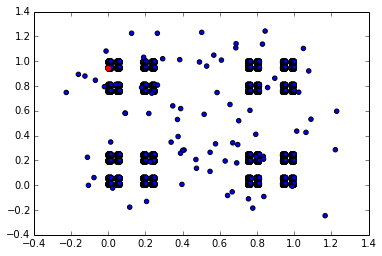

In [49]:
df = array([dataX,dataY]).T
scatter(df[:,0], df[:,1])
scatter(df[50][0], df[50][1], color = 'red')

In [50]:
def gaussSim(a, b, sigma = 0.15, eps = 0.001):
    out = np.exp(- sum((a-b)**2)/sigma)
    if(out< eps):
        return 0
    else:
        return out   
        
gaussSim(df[0],df[50])        
    

0.0027502779100519489

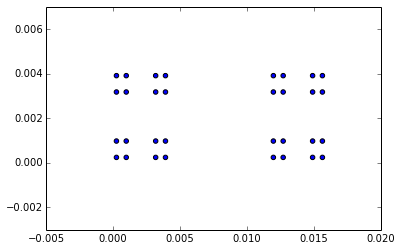

In [51]:
df_small = df[(df[:,0]< 0.03) & (df[:,1]< 0.005) & (df[:,1]> -0.01) & (df[:,0]> -0.01)]
scatter(df_small[:,0], df_small[:,1])

In [52]:
simMatrix = [[0 for i in df_small] for j in df_small]
for i,x in enumerate(df_small):
    for j,y in enumerate(df_small):
        simMatrix[i][j] = gaussSim(x, y, sigma = 0.00005)
simMatrix[0]   

[1.0,
 0.98932851262391397,
 0.84226433499998277,
 0.76473883049628089,
 0.98932851262391397,
 0.97877090589064597,
 0.83327612178170296,
 0.75657792972063698,
 0.84226433499998277,
 0.83327612178170296,
 0.7094092100129632,
 0.64411224251661447,
 0.76473883049628089,
 0.75657792972063698,
 0.64411224251661447,
 0.5848254788688193,
 0.06414673848332593,
 0.063462197373384016,
 0.05402851003107631,
 0.049055501767889441,
 0.045020667304339103,
 0.04454022982153788,
 0.037919302408344645,
 0.034429052462482436,
 0.013683912259002236,
 0.013537884562074824,
 0.011525471259026629,
 0.010464619057563089,
 0.0088139754115465225,
 0.0087199171842090705,
 0.0074236971387124312,
 0.0067403892482490631]

In [53]:
def get_next(i, c, alpha = 1):
    #print("top i",i,"alpha", alpha)
    old_perimeter = cluster_data[c]["perimeter"]
    old_area = cluster_data[c]["area"]
    best = None
    
    divided = old_area/(old_perimeter +0.0001)
    best_area = 0
    best_perimeter = 0
    for j in range(len(simMatrix[i])):
        
        new_area = old_area
        new_perimeter = old_perimeter

        if(clusters[j] != 0):
            continue
        for k, similarity in enumerate(simMatrix[j]):
            if(clusters[k] == c):

                new_area += simMatrix[j][k]
                new_perimeter -= simMatrix[j][k]
            elif(k != j):
                new_perimeter += simMatrix[j][k]
            else:
                pass
        if(new_area/(new_perimeter + 0.0001) > divided):
  
            best = j
            divided = new_area/(new_perimeter + 0.0001)
            best_area = new_area
            best_perimeter = new_perimeter 
        #print(j,old_area/old_perimeter, new_area/new_perimeter, old_area/(sum(simMatrix[j]) - 1))        
    if(alpha*best_area/(best_perimeter +0.0001)> old_area/(old_perimeter + 0.0001)):        
        return (best, best_area, best_perimeter)
    else:
        return (None,0,0)
            
            
            
            
            

cluster_data = {}            
clusters = [0 for i in df_small]
num_clusters = 0

#very_small = [1,2,3,4,5,6]
#simMatrix = [[1,1,1,0,0,0],[1,1,1,0,0,0],[1,1,1,1,0,0],[0,0,1,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1]]

for i, d in enumerate(df_small):
    #if(num_clusters>0):
    #    break
    if (clusters[i] == 0):
        node = i
        num_clusters +=1
        cluster_data[num_clusters] = {"area":0, "perimeter": sum(simMatrix[i])-1, "nodes": [node]}
        clusters[node] = num_clusters
        count = 0
        stack = [node]
        while True:
            #print(stack, stack[-1])
            next_node, next_area, next_perimeter = get_next(stack[-1], num_clusters, 0.7)
            count += 1
            if(next_node == None):
                stack.pop()
                if(len(stack) == 0):
                    break
            else:
                clusters[next_node] = num_clusters
                cluster_data[num_clusters]["area"] = next_area
                cluster_data[num_clusters]["perimeter"] = next_perimeter
                cluster_data[num_clusters]["nodes"].append(next_node)
                stack.append(next_node)
                node = next_node
    
                
print(cluster_data)
#print(simMatrix[0])

{1: {'nodes': [0, 1, 4, 5], 'perimeter': 40.331057572917999, 'area': 5.9148558622769478}, 2: {'nodes': [2, 3, 7, 6], 'perimeter': 40.331057572917992, 'area': 5.9148558622769478}, 3: {'nodes': [8, 12, 9, 13], 'perimeter': 46.24253032740247, 'area': 5.9148558622769478}, 4: {'nodes': [10, 11, 15, 14], 'perimeter': 46.242530327402477, 'area': 5.9148558622769478}, 5: {'nodes': [16, 20, 21, 17], 'perimeter': 46.242530327402484, 'area': 5.9148558622769478}, 6: {'nodes': [18, 19, 23, 22], 'perimeter': 46.242530327402491, 'area': 5.9148558622769478}, 7: {'nodes': [24, 28, 29, 25], 'perimeter': 40.331057572917999, 'area': 5.9148558622769478}, 8: {'nodes': [26, 31, 30, 27], 'perimeter': 40.331057572918006, 'area': 5.9148558622769478}}


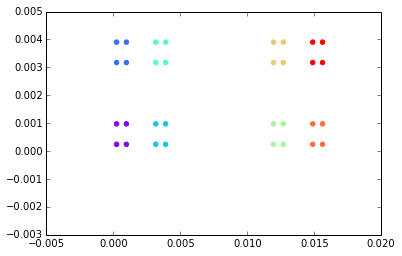

In [54]:
colors = cm.rainbow(np.linspace(0, 1, len(cluster_data)))
for i, c in enumerate(colors):
    for d in cluster_data[i+1]['nodes']:
        scatter(df_small[d][0],df_small[d][1], color = c)


In [55]:
def get_next(i, c, simMatrix, alpha = 1):
    #print("top i",i,"alpha", alpha)
    old_perimeter = cluster_data[c]["perimeter"]
    old_area = cluster_data[c]["area"]
    best = None
    
    divided = old_area/(old_perimeter +0.0001)
    best_area = 0
    best_perimeter = 0
    for j in range(len(simMatrix[i])):
        
        new_area = old_area
        new_perimeter = old_perimeter

        if(clusters[j] != 0):
            continue
        for k, similarity in enumerate(simMatrix[j]):
            if(clusters[k] == c):

                new_area += simMatrix[j][k]
                new_perimeter -= simMatrix[j][k]
            elif(k != j):
                new_perimeter += simMatrix[j][k]
            else:
                pass
        if(new_area/(new_perimeter + 0.0001) > divided):
  
            best = j
            divided = new_area/(new_perimeter + 0.0001)
            best_area = new_area
            best_perimeter = new_perimeter        
    if(alpha*best_area/(best_perimeter +0.0001)> old_area/(old_perimeter + 0.0001)):        
        return (best, best_area, best_perimeter)
    else:
        return (None,0,0)
            
            

In [60]:
adjacencyMatrix = open("adjacencyMatrix.data").read()
coordinates = open("coordinates.data").read()
coo = coordinates.split()
coordinates = array([float(i) for i in coo]).reshape(len(coo)//2,2)
aMatrix = adjacencyMatrix.split()
adjacencyMatrix = array([float(i) for i in aMatrix]).reshape(len(coo)//2,len(coo)//2)

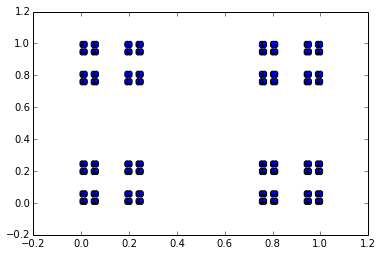

In [61]:
for d in coordinates:
    scatter(d[0],d[1])

In [74]:
cluster_data = {}            
clusters = [0 for i in coordinates]
num_clusters = 0
for i, d in enumerate(coordinates):
    #if(num_clusters>0):
    #    break
    if (clusters[i] == 0):
        node = i
        num_clusters +=1
        cluster_data[num_clusters] = {"area":0, "perimeter": sum(adjacencyMatrix[i])-1, "nodes": [node]}
        clusters[node] = num_clusters
        count = 0
        stack = [node]
        while True:
            #print(stack, stack[-1])
            next_node, next_area, next_perimeter = get_next(stack[-1], num_clusters, adjacencyMatrix ,0.92)
            count += 1
            if(next_node == None):
                stack.pop()
                if(len(stack) == 0):
                    break
            else:
                clusters[next_node] = num_clusters
                cluster_data[num_clusters]["area"] = next_area
                cluster_data[num_clusters]["perimeter"] = next_perimeter
                cluster_data[num_clusters]["nodes"].append(next_node)
                stack.append(next_node)
                node = next_node        
print(len(cluster_data)) 

16


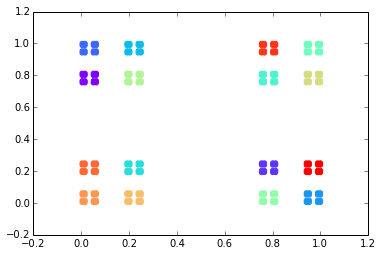

In [75]:
colors = cm.rainbow(np.linspace(0, 1, len(cluster_data)))
shuffle(colors)
for i, c in enumerate(colors):
    for j in cluster_data[i+1]['nodes']:
        scatter(coordinates[j][0],coordinates[j][1], color = c)